In [8]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
mpl.rcParams['figure.dpi']= 150

from sklearn import svm


In [2]:
# Columns: ['data', 'filenames', 'target_names', 'target', 'source', 'partition', 'doc_vector']
data = pd.read_pickle('data/newsgroup_vectors.pkl')

In [3]:
shuffled_idxs = data.index.values # Not actually shuffled yet
np.random.shuffle(shuffled_idxs) # Shuffles inplace

train_perc = .8
split_idx = round(len(shuffled_idxs) * .8)

train = data.iloc[0:split_idx].reset_index(drop=True)
text = data[split_idx:-1].reset_index(drop=True)

In [4]:
X = train.doc_vector.tolist()
y = train.target.tolist()

clf = svm.SVC(gamma='scale', decision_function_shape='ovo').fit(X, y)

clf.score(X, y) # Only reports score

TypeError: must be real number, not str

In [5]:
# Basic model with activation functions
f1 = pd.read_csv('model_train_results/basic_model-50.pkl').rename(columns={'Unnamed: 0':'epoch'})
f1['model'] = 'basic_model-50'
f2 = pd.read_csv('model_train_results/basic_model-75.pkl').rename(columns={'Unnamed: 0':'epoch'})
f2['model'] = 'basic_model-75'
f3 = pd.read_csv('model_train_results/basic_model-100.pkl').rename(columns={'Unnamed: 0':'epoch'})
f3['model'] = 'basic_model-100'
f4 = pd.read_pickle('model_train_results/basic_model-200.pkl').reset_index().rename(columns={'index':'epoch'})
f4['model'] = 'basic_model-200'



# Basic model without activation functions
f5 = pd.read_csv('model_train_results/basic_model-na-50.pkl').rename(columns={'Unnamed: 0':'epoch'})
f5['model'] = 'basic_model-na-50'
f6 = pd.read_csv('model_train_results/basic_model-na-75.pkl').rename(columns={'Unnamed: 0':'epoch'})
f6['model'] = 'basic_model-na-75'
f7 = pd.read_csv('model_train_results/basic_model-na-100.pkl').rename(columns={'Unnamed: 0':'epoch'})
f7['model'] = 'basic_model-na-100'
f8 = pd.read_pickle('model_train_results/basic_model-na-200.pkl').reset_index().rename(columns={'index':'epoch'})
f8['model'] = 'basic_model-na-200'

results = pd.concat([f1,f2,f3,f4,f5,f6,f7,f8], ignore_index=True).reset_index(drop=True)
results['epoch'] += 1
results

,epoch,mean_train_loss,mean_val_loss,train_acc,val_acc,runtime,model
0,1,3.202187,3.150115,0.052136,0.056514,4.653082,basic_model-50
1,2,3.186165,3.131214,0.051871,0.053064,4.650519,basic_model-50
2,3,3.177597,3.131214,0.051207,0.053064,5.345208,basic_model-50
3,4,3.177597,3.131214,0.051207,0.053064,4.776084,basic_model-50
4,5,3.177597,3.131214,0.051207,0.053064,4.556151,basic_model-50
5,6,3.177597,3.131214,0.051207,0.053064,4.550200,basic_model-50
6,7,3.177597,3.131214,0.051207,0.053064,4.556100,basic_model-50
7,8,3.177597,3.131214,0.051207,0.053064,4.550834,basic_model-50
8,9,3.177597,3.131214,0.051207,0.053064,4.572900,basic_model-50
9,10,3.177597,3.131214,0.051207,0.053064,4.597578,basic_model-50


In [6]:
results.loc[results['model']=='basic_model-200']

,epoch,mean_train_loss,mean_val_loss,train_acc,val_acc,runtime,model
45,1,3.194980,3.139492,0.052370,0.053935,2.676374,basic_model-200
46,2,3.181620,3.139528,0.053254,0.053935,2.881594,basic_model-200
47,3,3.208823,3.157762,0.052370,0.053492,3.274789,basic_model-200
48,4,3.232620,3.174488,0.050934,0.053935,3.343146,basic_model-200
49,5,3.225377,3.174351,0.051044,0.053935,3.229685,basic_model-200
50,6,3.225246,3.174307,0.051155,0.053935,3.142526,basic_model-200
51,7,3.225173,3.174304,0.051155,0.053935,3.121470,basic_model-200
52,8,3.225111,3.174303,0.051265,0.053935,3.148850,basic_model-200
53,9,3.225084,3.174303,0.051265,0.053935,3.316896,basic_model-200
54,10,3.225069,3.174303,0.051265,0.053935,2.981367,basic_model-200


<Figure size 6000x900 with 0 Axes>

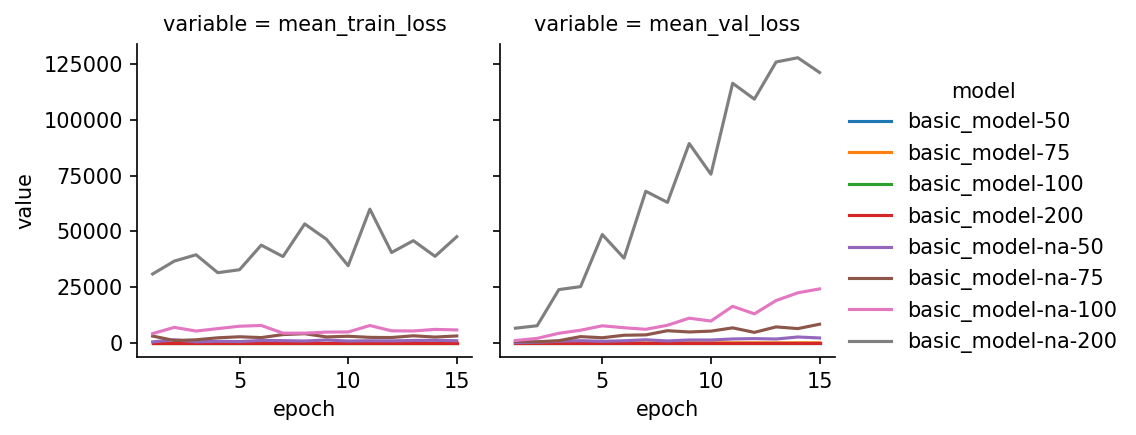

In [9]:
melt = pd.melt(results, id_vars = ['epoch', 'model'], value_vars = results.iloc[:,1:3])
plt.figure(figsize=(40,6))
g = sns.FacetGrid(melt, col="variable", hue='model')
g = g.map(sns.lineplot, "epoch", 'value').add_legend()

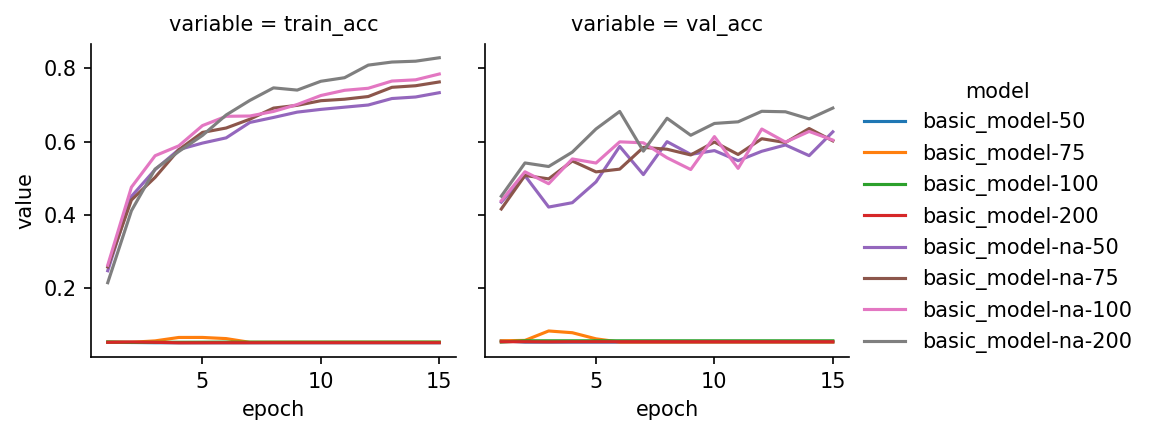

In [10]:
melt = pd.melt(results, id_vars = ['epoch', 'model'], value_vars = results.iloc[:,3:5])

g = sns.FacetGrid(melt, col="variable", hue='model')
g = g.map(sns.lineplot, "epoch", 'value').add_legend()

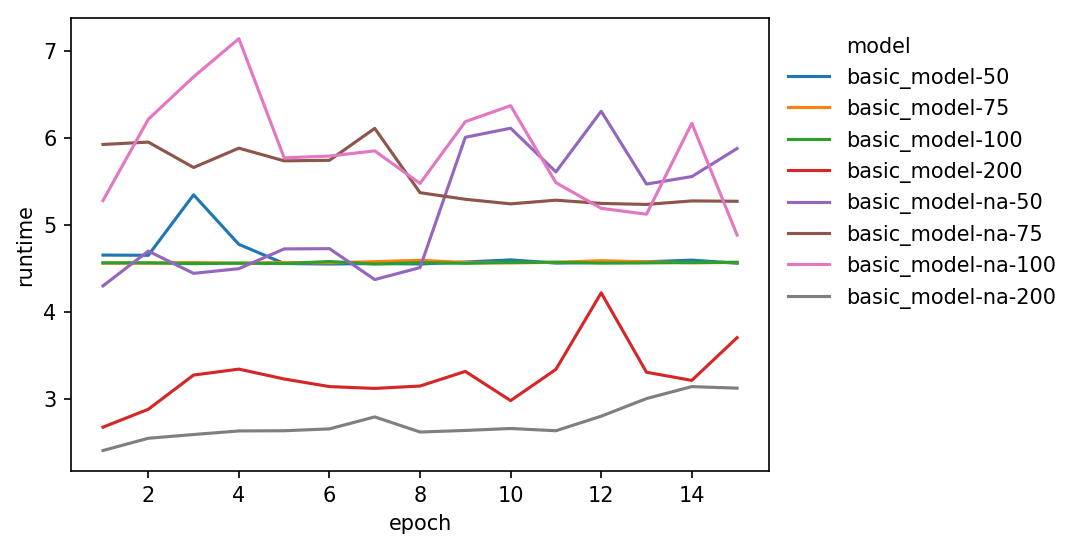

In [11]:
ax = sns.lineplot('epoch', 'runtime', data=results, hue='model')
ax.legend(frameon = False, loc='upper left', bbox_to_anchor=(1, 1))

# Node Postprocessing

In [12]:
nodeTest = pd.read_csv('model_train_results/node_200_test.csv')
len(nodeTest.loc[nodeTest['y_true']==nodeTest['y_pred']])/len(nodeTest)

0.615108868826341

In [13]:
nodeEpochs = pd.read_csv('model_train_results/node_200.csv').reset_index().rename({'epoch_time':'runtime','index':'epoch'},axis=1)
nodeEpochs['model'] = 'NODE-model-200'
nodeEpochs['epoch']+=1

nodeEpochs

,epoch,runtime,mean_train_loss,mean_val_loss,train_acc,val_acc,model
0,1,36.264852,65.279755,42.688625,0.476853,0.624668,NODE-model-200
1,2,29.118691,54.814838,72.657600,0.681361,0.655172,NODE-model-200
2,3,27.893131,57.527367,85.554176,0.753839,0.697171,NODE-model-200
3,4,27.368103,65.504410,106.579735,0.790852,0.717065,NODE-model-200
4,5,27.328053,47.981335,188.072296,0.823003,0.675066,NODE-model-200
5,6,27.236272,46.447987,176.606293,0.848304,0.705570,NODE-model-200
6,7,27.280707,55.738617,176.049454,0.858579,0.732980,NODE-model-200
7,8,27.162542,52.663822,219.704010,0.869296,0.739611,NODE-model-200
8,9,27.098492,49.698681,286.952179,0.890399,0.720601,NODE-model-200
9,10,27.097813,44.647671,322.871338,0.899901,0.713528,NODE-model-200


In [14]:
resultsNode = pd.concat([results,nodeEpochs],ignore_index=True)

resultsNode

C:\Users\ibiyt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,epoch,mean_train_loss,mean_val_loss,model,runtime,train_acc,val_acc
0,1,3.202187,3.150115,basic_model-50,4.653082,0.052136,0.056514
1,2,3.186165,3.131214,basic_model-50,4.650519,0.051871,0.053064
2,3,3.177597,3.131214,basic_model-50,5.345208,0.051207,0.053064
3,4,3.177597,3.131214,basic_model-50,4.776084,0.051207,0.053064
4,5,3.177597,3.131214,basic_model-50,4.556151,0.051207,0.053064
5,6,3.177597,3.131214,basic_model-50,4.550200,0.051207,0.053064
6,7,3.177597,3.131214,basic_model-50,4.556100,0.051207,0.053064
7,8,3.177597,3.131214,basic_model-50,4.550834,0.051207,0.053064
8,9,3.177597,3.131214,basic_model-50,4.572900,0.051207,0.053064
9,10,3.177597,3.131214,basic_model-50,4.597578,0.051207,0.053064


<Figure size 6000x900 with 0 Axes>

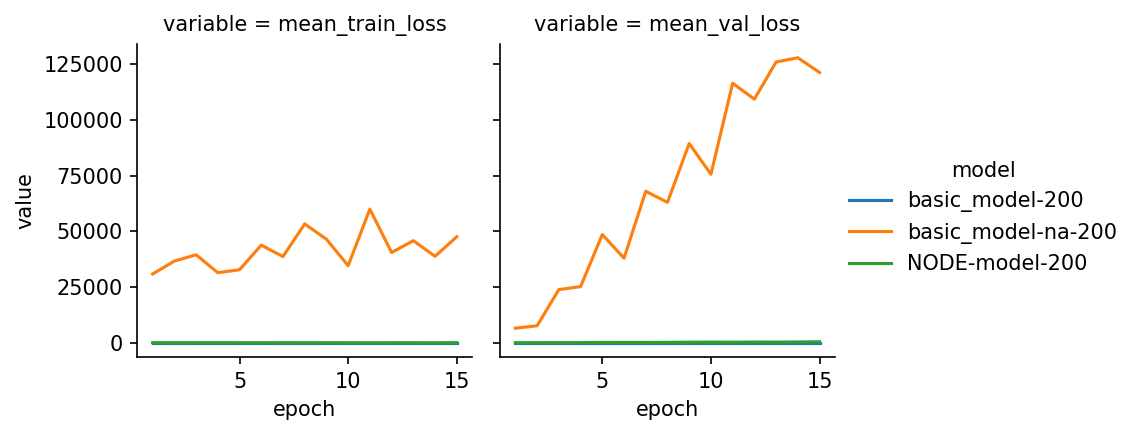

In [15]:
melt = pd.melt(resultsNode.loc[resultsNode['model'].isin(['basic_model-200','basic_model-na-200','NODE-model-200'])], id_vars = ['epoch', 'model'], value_vars = results.iloc[:,1:3])
plt.figure(figsize=(40,6))
g = sns.FacetGrid(melt, col="variable", hue='model')
g = g.map(sns.lineplot, "epoch", 'value').add_legend()


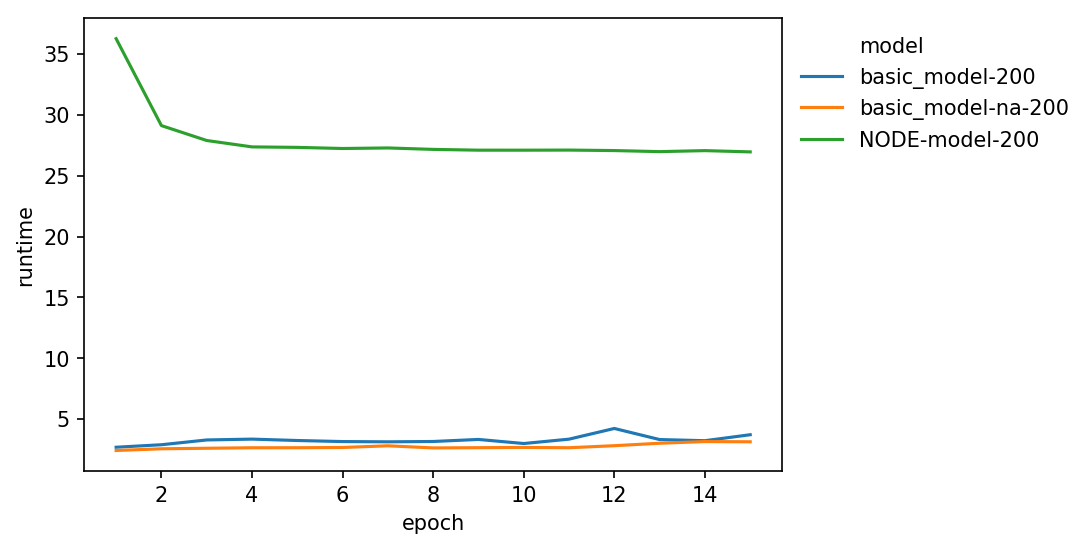

In [16]:
ax = sns.lineplot('epoch', 'runtime', data=resultsNode.loc[resultsNode['model'].isin(['basic_model-200','basic_model-na-200','NODE-model-200'])], hue='model')
ax.legend(frameon = False, loc='upper left', bbox_to_anchor=(1, 1))

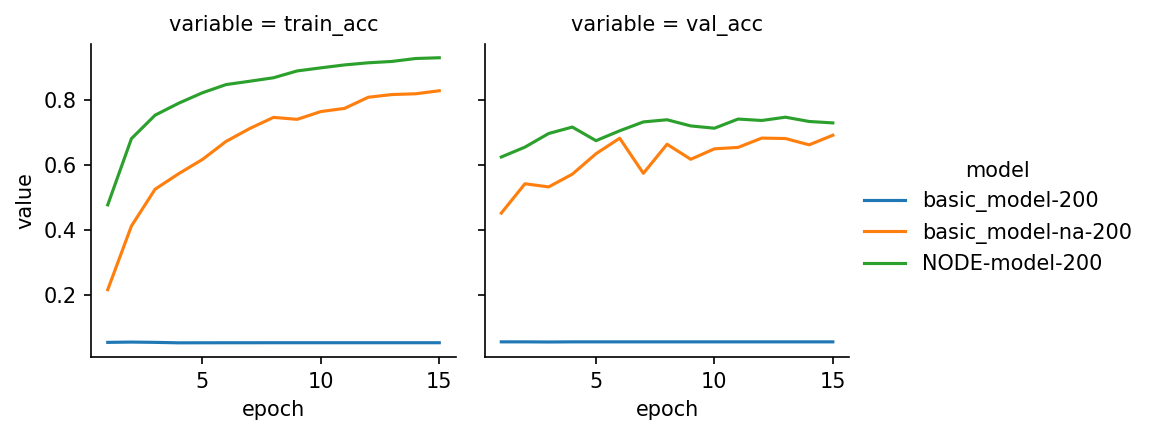

In [17]:
melt = pd.melt(resultsNode.loc[resultsNode['model'].isin(['basic_model-200','basic_model-na-200','NODE-model-200'])], id_vars = ['epoch', 'model'], value_vars = resultsNode.iloc[:,5:])

g = sns.FacetGrid(melt, col="variable", hue='model')
g = g.map(sns.lineplot, "epoch", 'value').add_legend()

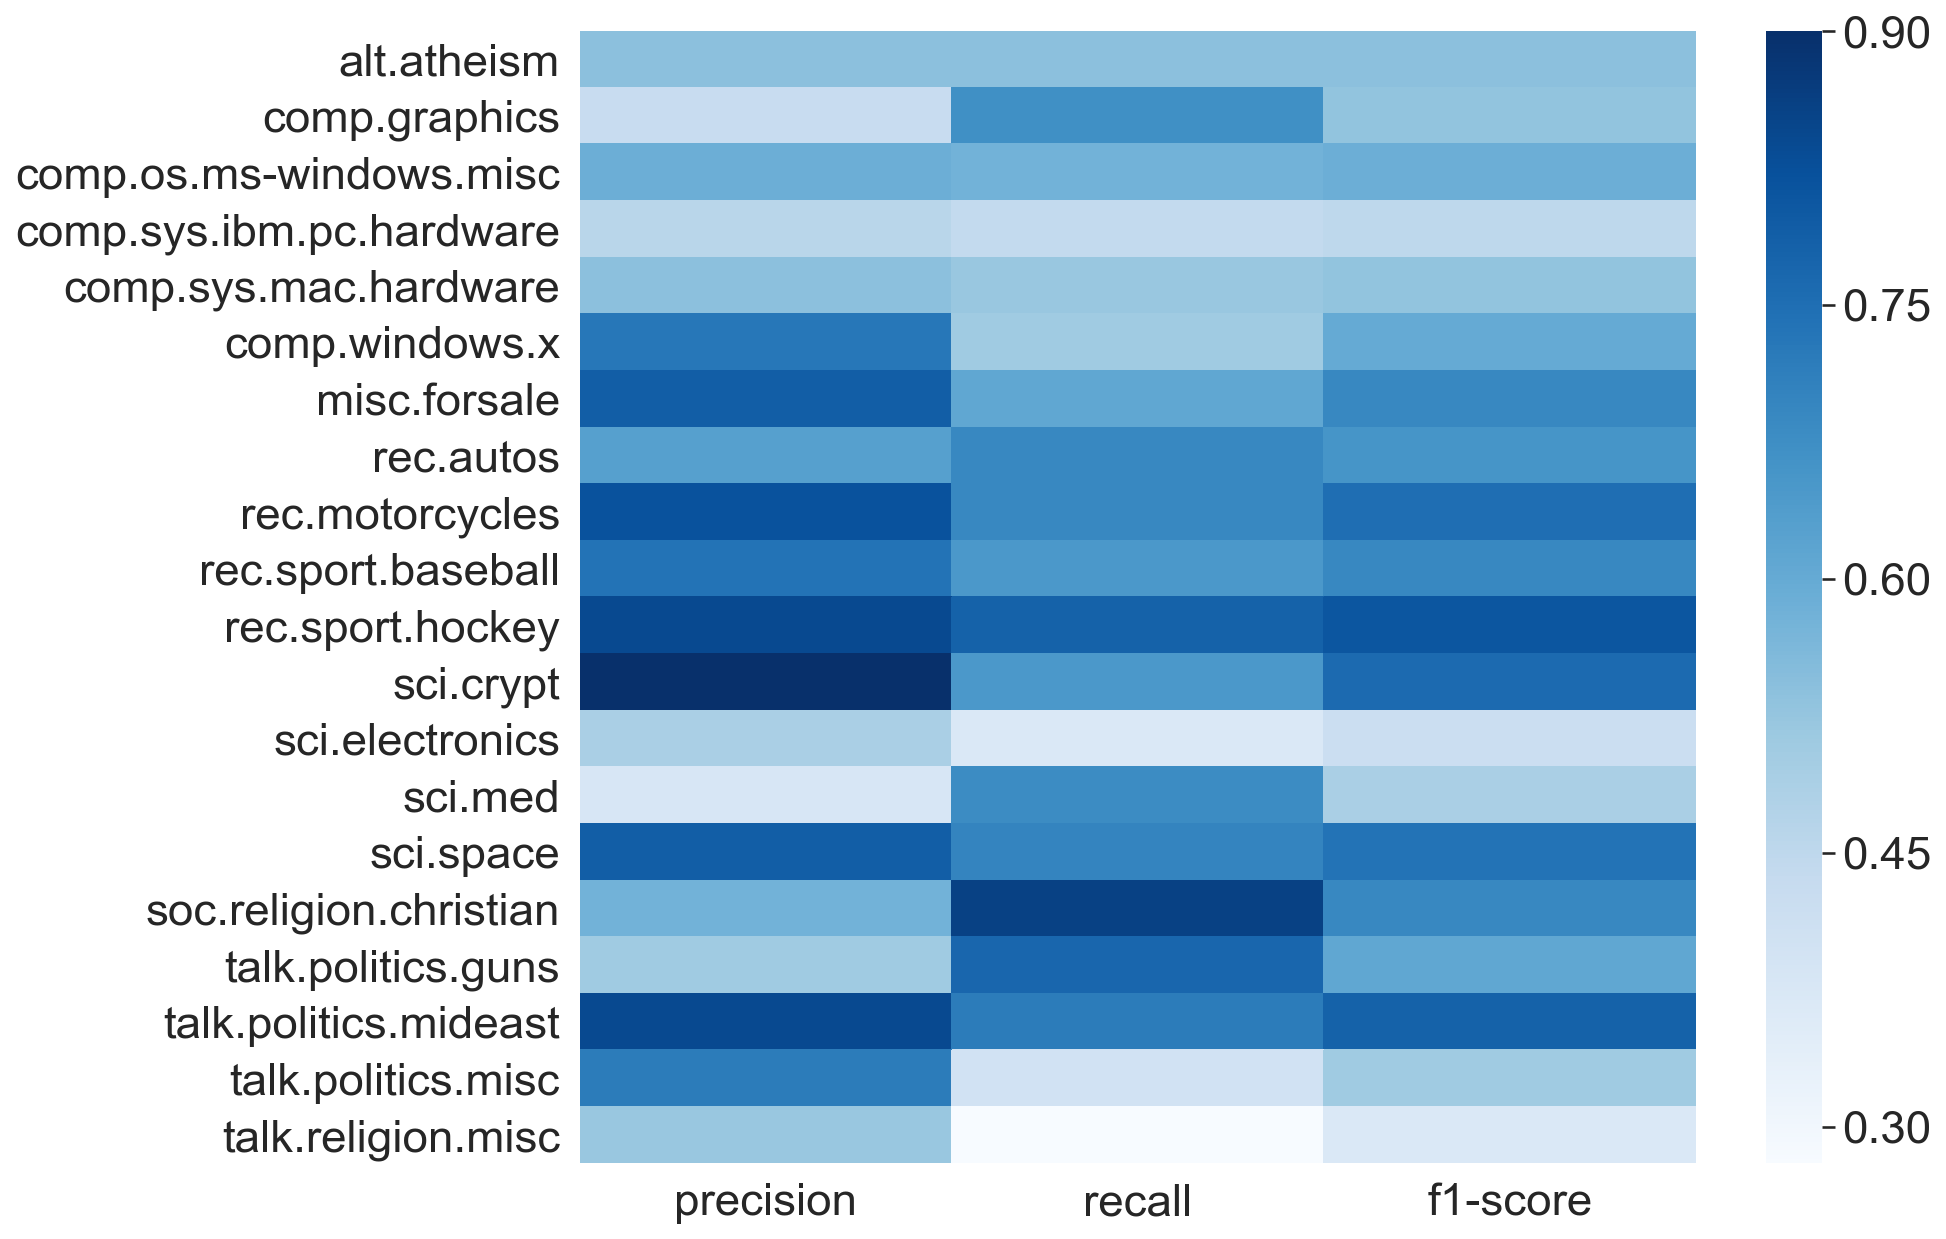

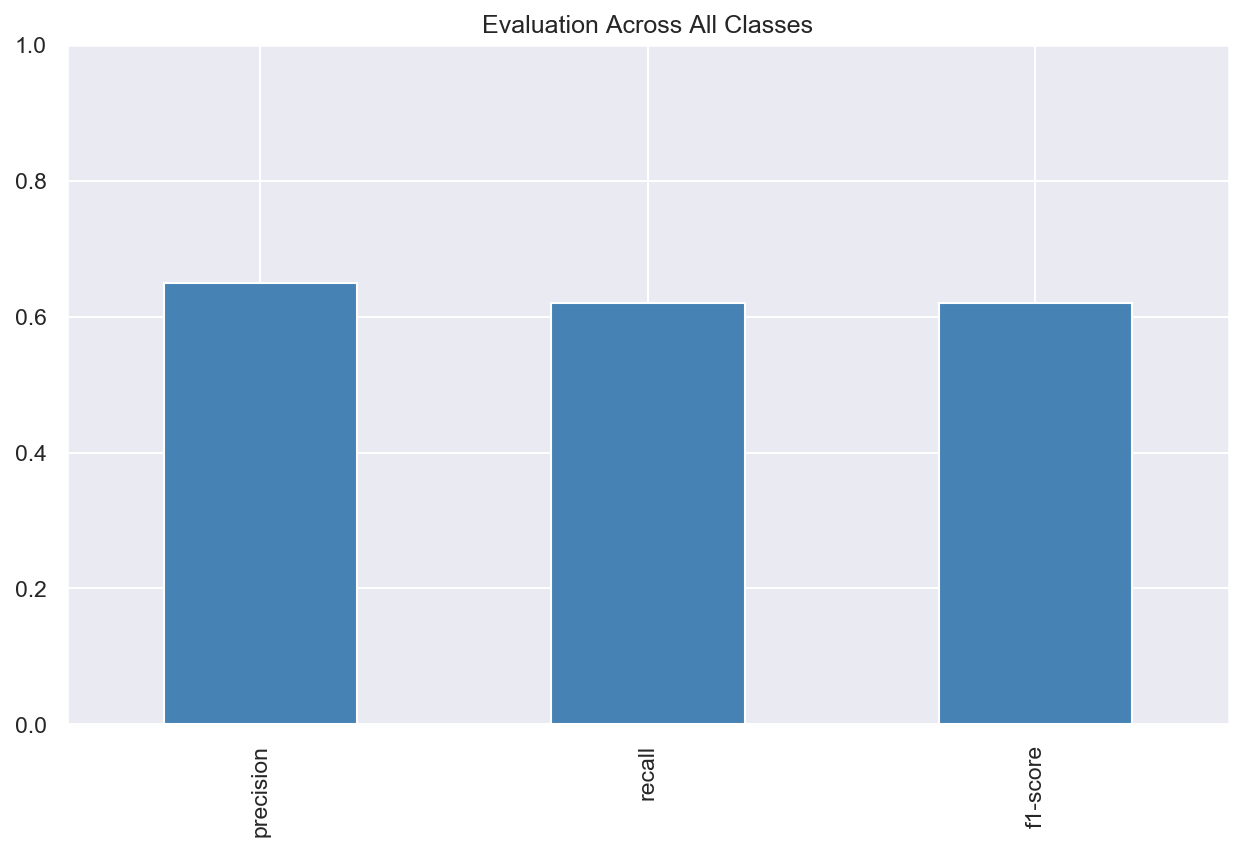

In [18]:
def createClassificationReportHeatMap(data,predCol,trueCol):
    labels = pd.read_pickle('data/newsgroup.pkl')[['target','source']].drop_duplicates().set_index('target',drop=True).reset_index()
    table = [[y for y in x.split(' ') if y!=''] for x in classification_report(y_pred=data[predCol],y_true=data[trueCol]).split('\n') if x!='']
    columns = table[0]
    table = table[1:]
    for i in range(len(table)):
        if i<len(table)-1:
            table[i] = table[i][1:]
        elif i==len(table)-1:
            table[i] = table[i][3:]
    table = pd.DataFrame(table,columns=columns).drop('support',axis=1).astype(float)
    avg = table.iloc[-1]
    table = table.iloc[:-1]
    table = table.merge(labels,left_index=True,right_on='target')
    table.index = table['source']
    del table.index.name
    table.drop(['source','target'],axis=1,inplace=True)

    plt.figure(figsize=(12,10))
    sns.set(font_scale=2)
    sns.heatmap(table,cmap='Blues')
    plt.figure()
    sns.set()
    avg.plot(kind='bar',ylim=(0,1),color='steelblue',figsize=(10,6),title='Evaluation Across All Classes')
    

createClassificationReportHeatMap(nodeTest,'y_pred','y_true')

## FFN Test

In [19]:
ffnTest = pd.read_csv('model_train_results/ffn_200_test.csv')
len(ffnTest.loc[ffnTest['y_true']==ffnTest['y_pred']])/len(ffnTest)

0.5740839086563994

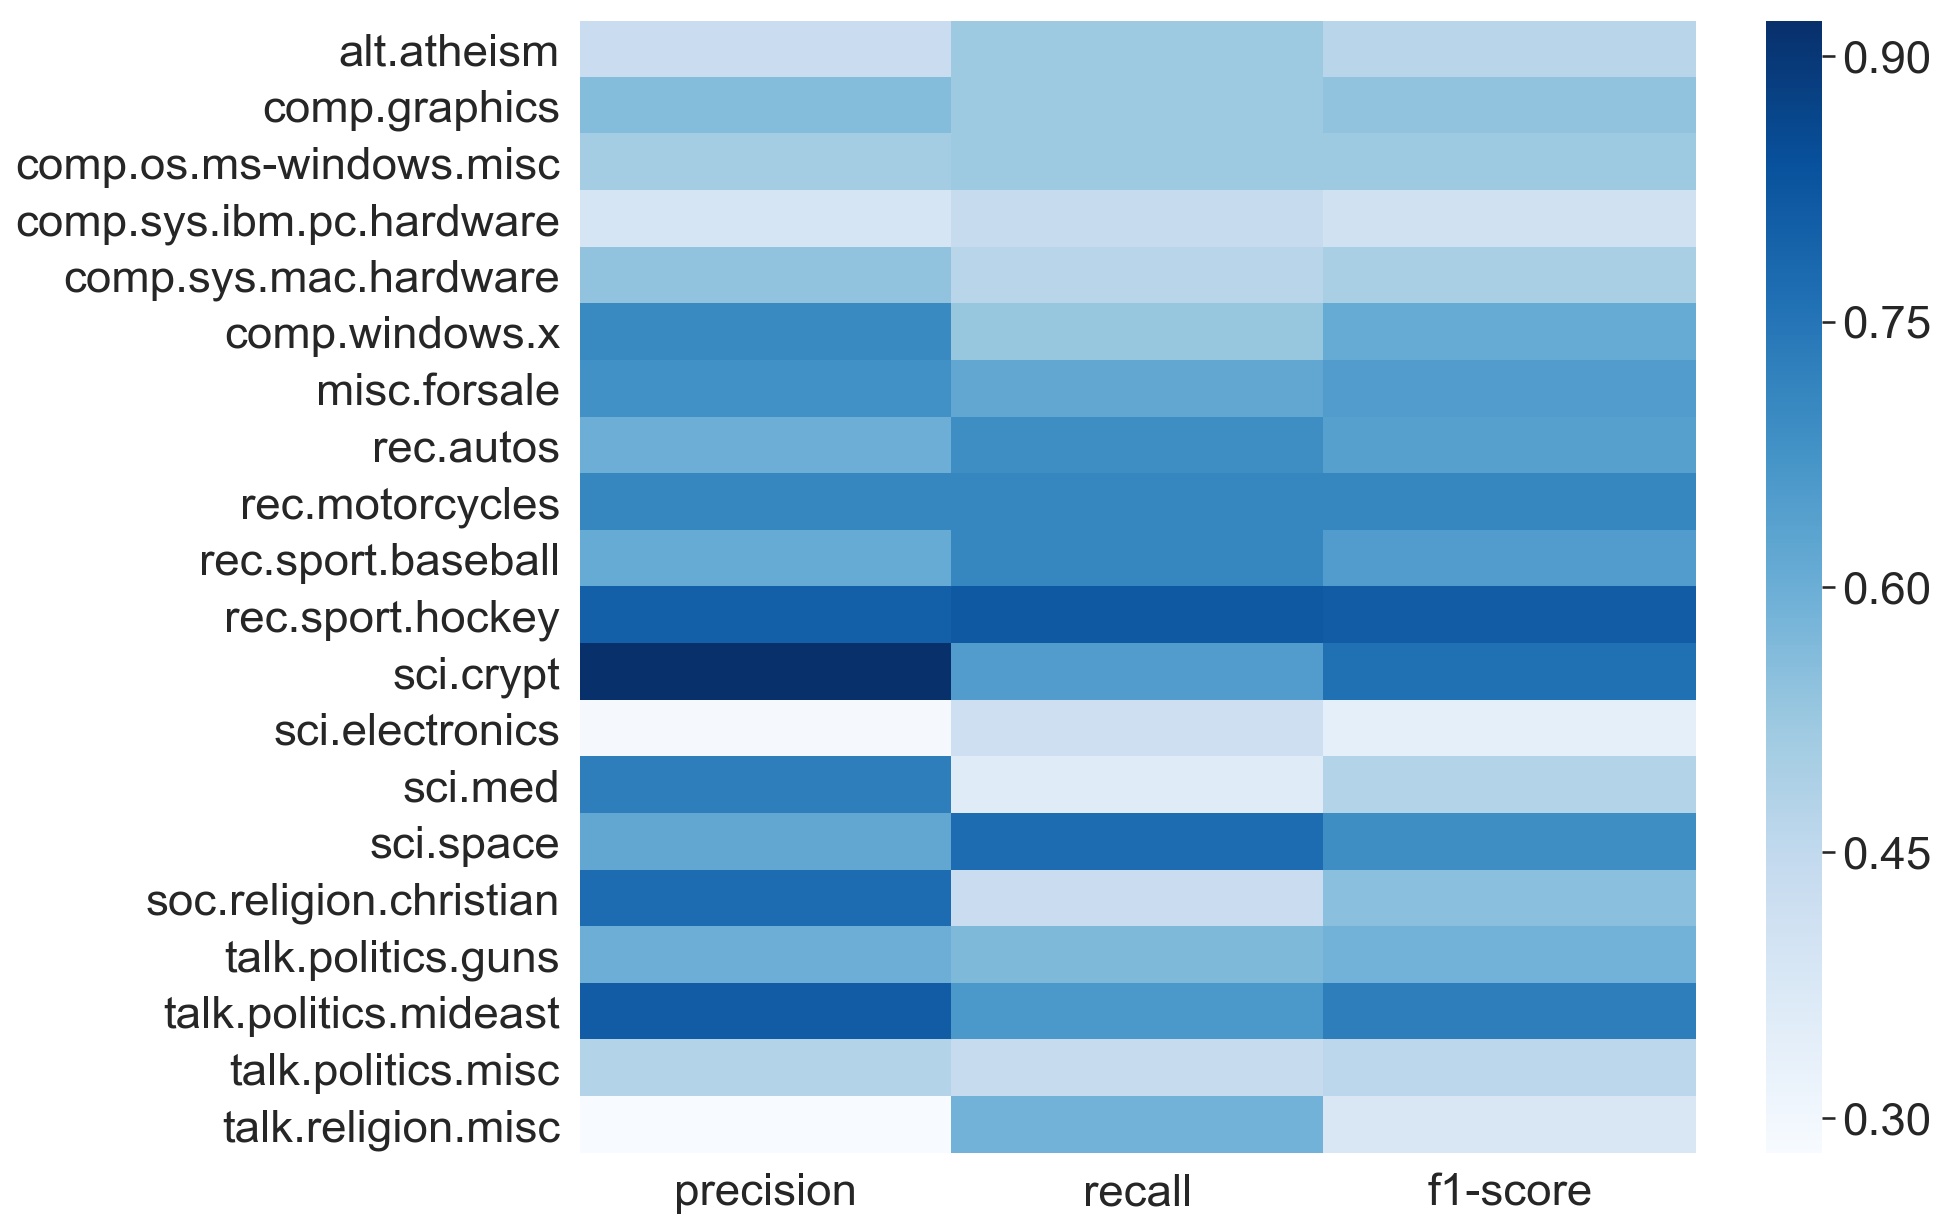

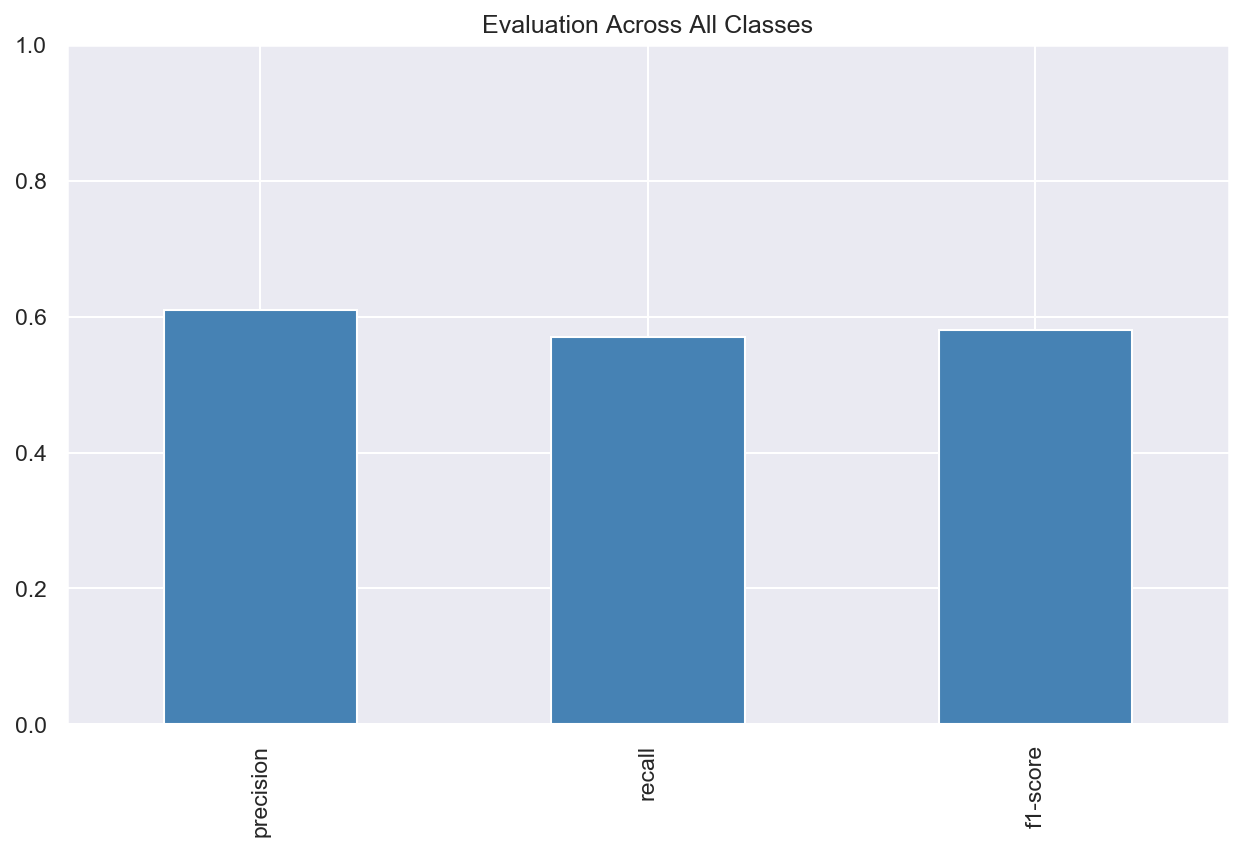

In [20]:
createClassificationReportHeatMap(ffnTest,'y_pred','y_true')

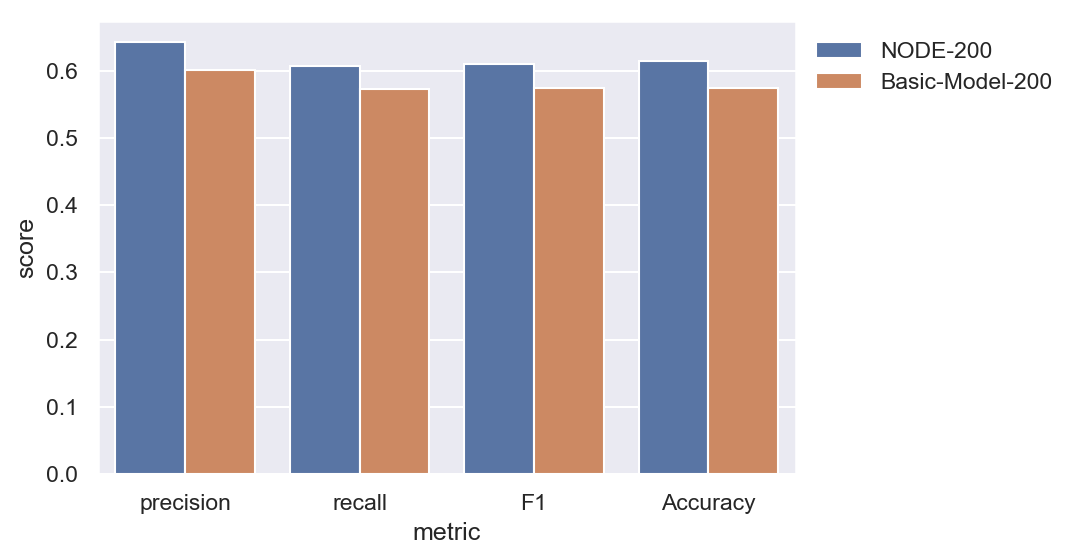

In [26]:
def compareMetrics(node,ffn):
    '''
    Compare precision, recall, f1 and accuracy of data for two datasets.
    '''
    nodePrecision = precision_score(y_pred=node['y_pred'],y_true=node['y_true'],average='macro')
    nodeRecall = recall_score(y_pred=node['y_pred'],y_true=node['y_true'],average='macro')
    nodeF1 = f1_score(y_pred=node['y_pred'],y_true=node['y_true'],average='macro')
    nodeAcc = accuracy_score(y_pred=node['y_pred'],y_true=node['y_true'])
    
    ffnPrecision = precision_score(y_pred=ffn['y_pred'],y_true=ffn['y_true'],average='macro')
    ffnRecall = recall_score(y_pred=ffn['y_pred'],y_true=ffn['y_true'],average='macro')
    ffnF1 = f1_score(y_pred=ffn['y_pred'],y_true=ffn['y_true'],average='macro')
    ffnAcc = accuracy_score(y_pred=ffn['y_pred'],y_true=ffn['y_true'])

    
    data = pd.DataFrame([['precision',nodePrecision,'NODE-200'],
                 ['recall',nodeRecall,'NODE-200'],
                 ['F1',nodeF1,'NODE-200'],
                 ['Accuracy',nodeAcc,'NODE-200'],
                 ['precision',ffnPrecision,'Basic-Model-200'],
                 ['recall',ffnRecall,'Basic-Model-200'],
                 ['F1',ffnF1,'Basic-Model-200'],
                 ['Accuracy',ffnAcc,'Basic-Model-200']],columns=['metric','score','model'])
    ax=sns.barplot(data=data,x='metric',y='score',hue='model')
    ax.legend(frameon = False, loc='upper left', bbox_to_anchor=(1, 1))
compareMetrics(nodeTest,ffnTest)